In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving apps.csv to apps.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving user_reviews.csv to user_reviews.csv


In [ ]:
apps = pd.read_csv('apps.csv')
user_reviews = pd.read_csv('user_reviews.csv')

In [ ]:
print(apps.columns)

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')


Unnamed is an index column so we can drop it.

In [ ]:
apps = apps.drop(columns=['Unnamed: 0'])

In [ ]:
apps.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
print(apps.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 981.1+ KB


In [ ]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
print("Shape of the dataset:", apps.shape)
print("Shape of the dataset:", user_reviews.shape)

Shape of the dataset: (9659, 13)
Shape of the dataset: (64295, 5)


In [ ]:
print(apps.isnull().sum())

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [ ]:
# Drop rows where Current Ver or Android Ver are missing
apps.dropna(subset=['Current Ver', 'Android Ver'], inplace=True)

print(apps.shape)

(9649, 13)


Check if it has outliers in order to determine how to handle missing values

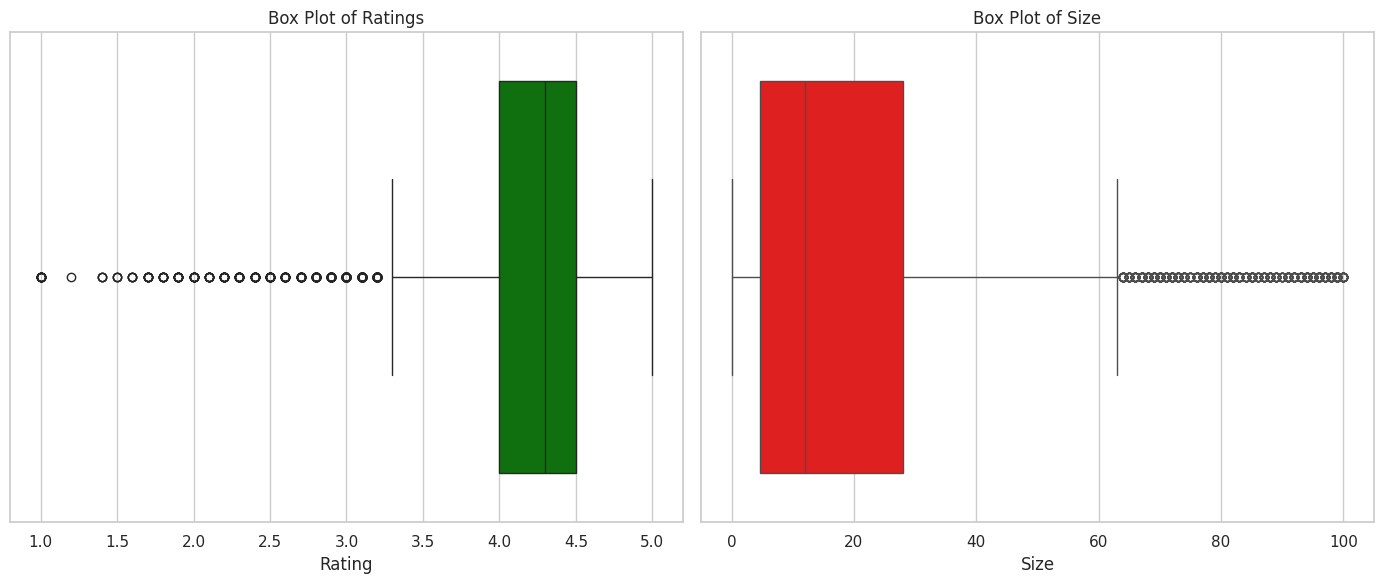

In [ ]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x=apps['Rating'], ax=axs[0], color='green')
axs[0].set_title('Box Plot of Ratings')
sns.boxplot(x=apps['Size'], ax=axs[1], color='red')
axs[1].set_title('Box Plot of Size')
plt.tight_layout()
plt.show()

Due to the presence of outliers, it's best to impute with median

In [ ]:
apps['Rating'].fillna(apps['Rating'].median(), inplace=True)
apps['Size'].fillna(apps['Size'].median(), inplace=True)

<ipython-input-19-0fc98e1d1567>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps['Rating'].fillna(apps['Rating'].median(), inplace=True)
<ipython-input-19-0fc98e1d1567>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
print(apps.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [ ]:
duplicates = apps.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [ ]:
print(apps.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [ ]:
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'], errors='coerce')

In [ ]:
# Clean columns Installs and Price
apps['Installs'] = apps['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
apps['Price'] = apps['Price'].str.replace('$', '').astype(float)

In [ ]:
print(user_reviews.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [ ]:
user_reviews.dropna(subset=['Sentiment'], inplace=True)

In [ ]:
print(user_reviews.isnull().sum())

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [ ]:
user_reviews.dropna(subset=['Translated_Review'], inplace=True)

In [ ]:
print(user_reviews.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [ ]:
print("Shape of the dataset:", user_reviews.shape)

Shape of the dataset: (37427, 5)


In [ ]:
from collections import UserDict
print(user_reviews.dtypes)

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object


In [ ]:
user_reviews['Sentiment'].value_counts()

,count
Sentiment,
Positive,23998
Negative,8271
Neutral,5158


Text(0.5, 1.0, 'Distribution of Sentiments')

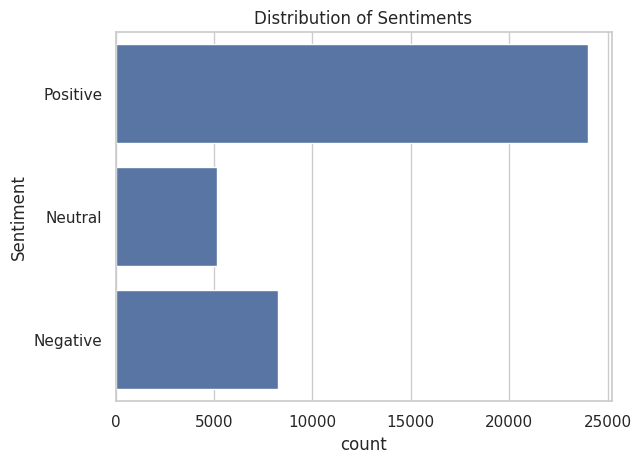

In [ ]:
sns.countplot(user_reviews.Sentiment)
plt.title("Distribution of Sentiments")

There is a dominance of positive sentiments

#**Data Preprocessing**

In [ ]:
import re
def clean_text(text):
    text = text.lower()  #lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

# Apply cleaning Translated_Review column
user_reviews['Translated_Review'] = user_reviews['Translated_Review'].apply(clean_text)

In [ ]:

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')


#Tokenization and Stop Word Removal
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stop_words]

user_reviews['Tokens'] = user_reviews['Translated_Review'].apply(tokenize_and_remove_stopwords)
print(user_reviews[['Translated_Review', 'Tokens']].head())



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                   Translated_Review  \
0  i like eat delicious food thats im cooking foo...   
1    this help eating healthy exercise regular basis   
3         works great especially going grocery store   
4                                       best idea us   
5                                           best way   

                                              Tokens  
0  [like, eat, delicious, food, thats, im, cookin...  
1  [help, eating, healthy, exercise, regular, basis]  
3  [works, great, especially, going, grocery, store]  
4                                   [best, idea, us]  
5                                        [best, way]  


In [ ]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

# lemmatization
lemmatizer = WordNetLemmatizer()

# lemmatize tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

user_reviews['Lemmatized_Tokens'] = user_reviews['Tokens'].apply(lemmatize_tokens)

print(user_reviews[['Tokens', 'Lemmatized_Tokens']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              Tokens  \
0  [like, eat, delicious, food, thats, im, cookin...   
1  [help, eating, healthy, exercise, regular, basis]   
3  [works, great, especially, going, grocery, store]   
4                                   [best, idea, us]   
5                                        [best, way]   

                                   Lemmatized_Tokens  
0  [like, eat, delicious, food, thats, im, cookin...  
1  [help, eating, healthy, exercise, regular, basis]  
3   [work, great, especially, going, grocery, store]  
4                                    [best, idea, u]  
5                                        [best, way]  


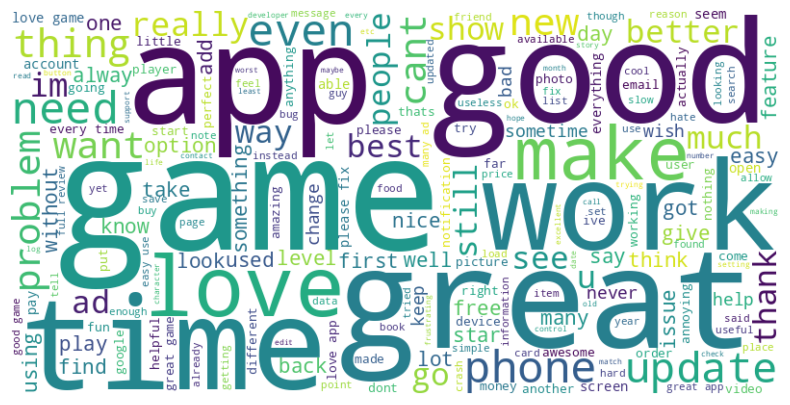

In [ ]:
from wordcloud import WordCloud

all_words = ' '.join([' '.join(tokens) for tokens in user_reviews['Lemmatized_Tokens']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer
tfidf = TfidfVectorizer()

user_reviews['Lemmatized_Text'] = user_reviews['Lemmatized_Tokens'].apply(' '.join)
X = tfidf.fit_transform(user_reviews['Lemmatized_Text'])
feature_names = tfidf.get_feature_names_out()

for sentiment in user_reviews['Sentiment'].unique():
    print(f"Top 10 words for sentiment '{sentiment}':")


    sentiment_index = user_reviews['Sentiment'] == sentiment
    sentiment_tfidf = X[sentiment_index].sum(axis=0).A1


    top_words_indices = np.argsort(sentiment_tfidf)[-10:]
    top_words = [feature_names[i] for i in top_words_indices]

    print(', '.join(top_words))
    print()

Top 10 words for sentiment 'Positive':
time, best, like, easy, app, nice, game, great, love, good

Top 10 words for sentiment 'Neutral':
app, working, phone, time, keep, need, please, cant, work, like

Top 10 words for sentiment 'Negative':
even, hate, play, cant, like, ad, bad, get, time, game



#**Feature Engineering and Feature Selection**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from scipy.sparse import hstack

# Creating TF-IDF features with n-grams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Unigrams and Bigrams
X_tfidf = tfidf_vectorizer.fit_transform(user_reviews['Lemmatized_Text'])

# Adding Review Length as a feature
user_reviews['Review_Length'] = user_reviews['Lemmatized_Text'].apply(lambda x: len(x.split()))
X_length = user_reviews[['Review_Length']].values  # Convert to array for concatenation

X_combined = hstack([X_tfidf, X_length])

# Feature Selection - top k features based on chi-squared test
X_selected = SelectKBest(chi2, k=1000).fit_transform(X_combined, user_reviews['Sentiment'])

print("Shape of the selected features:", X_selected.shape)

Shape of the selected features: (37427, 1000)


#**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, user_reviews['Sentiment'], test_size=0.2, random_state=42)

**1. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

#Naive Bayes classifier
model = MultinomialNB()


model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)

#classification report
print(classification_report(y_test, y_pred))

# accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))



              precision    recall  f1-score   support

    Negative       0.97      0.13      0.23      1653
     Neutral       0.96      0.18      0.31      1049
    Positive       0.68      1.00      0.81      4784

    accuracy                           0.69      7486
   macro avg       0.87      0.44      0.45      7486
weighted avg       0.78      0.69      0.61      7486

Accuracy: 0.692626235639861


This indicates that the model correctly predicts the sentiment for approximately 69.3% of the instances in the test dataset.


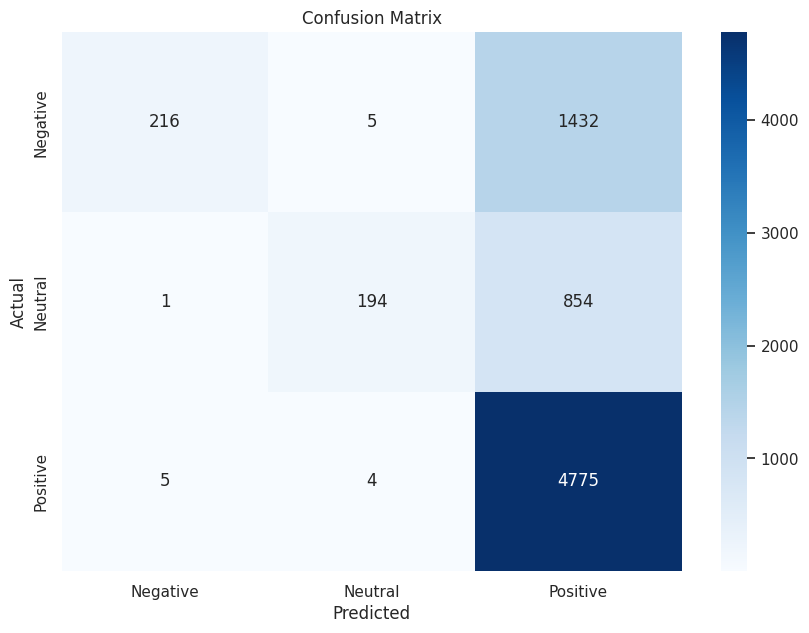

In [ ]:
from sklearn.metrics import confusion_matrix

# confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Negative', 'Neutral', 'Positive'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**2.Deep Learning**

In [ ]:
# Converting sentiment labels to numerical values
sentiment_mapping = {
    'positive': 1,
    'neutral': 0,
    'negative': -1
}

user_reviews['Sentiment_Numeric'] = user_reviews['Sentiment'].map(sentiment_mapping)

print(user_reviews[['Sentiment', 'Sentiment_Numeric']].head())

  Sentiment  Sentiment_Numeric
0  Positive                NaN
1  Positive                NaN
3  Positive                NaN
4  Positive                NaN
5  Positive                NaN


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


X = user_reviews['Lemmatized_Text']
y = user_reviews['Sentiment']

# Convert sentiments to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Tokenization
tokenizer = Tokenizer(num_words=10000)  # top 10,000 words
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.1)
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 156s 360ms/step - accuracy: 0.6359 - loss: 0.9149 - val_accuracy: 0.6551 - val_loss: 0.8714
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 199s 355ms/step - accuracy: 0.6413 - loss: 0.8982 - val_accuracy: 0.6551 - val_loss: 0.8715
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 201s 352ms/step - accuracy: 0.6381 - loss: 0.8997 - val_accuracy: 0.6551 - val_loss: 0.8719
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 201s 351ms/step - accuracy: 0.6411 - loss: 0.8964 - val_accuracy: 0.6554 - val_loss: 0.8716
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 204s 355ms/step - accuracy: 0.6436 - loss: 0.8939 - val_accuracy: 0.6554 - val_loss: 0.8709
234/234 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.6308 - loss: 0.9047
Test Accuracy: 0.6392


Epoch Performance:
The accuracy on the training set started at 63.59% for the first epoch and slowly increased to 64.36% by the fifth epoch.
The validation accuracy remained relatively stable, starting at 65.51% and peaking at 65.54%.

Loss Values:
The training loss decreased slightly from 0.9149 to 0.8939.
Validation loss fluctuated slightly but remained around 0.8714 to 0.8719.

Test Accuracy:
The model achieved a test accuracy of 63.92%.

Model Performance: An overall accuracy of around 63.92% indicates that the model is performing well, but there is room for improvement.

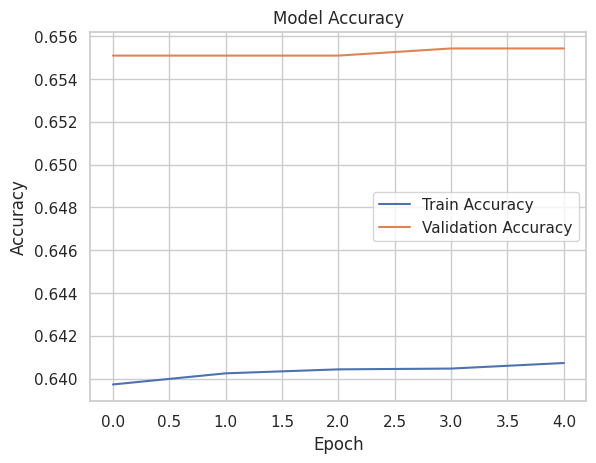

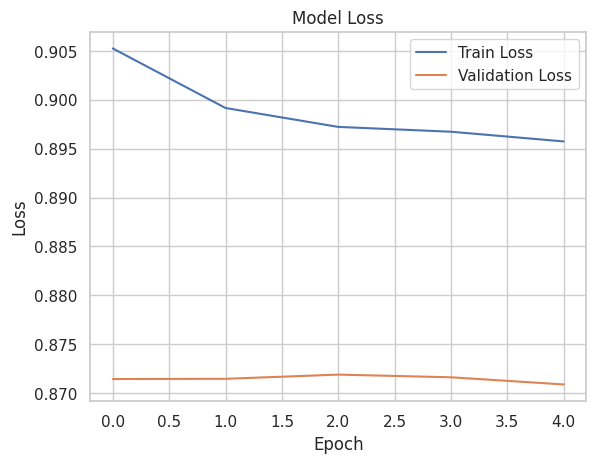

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

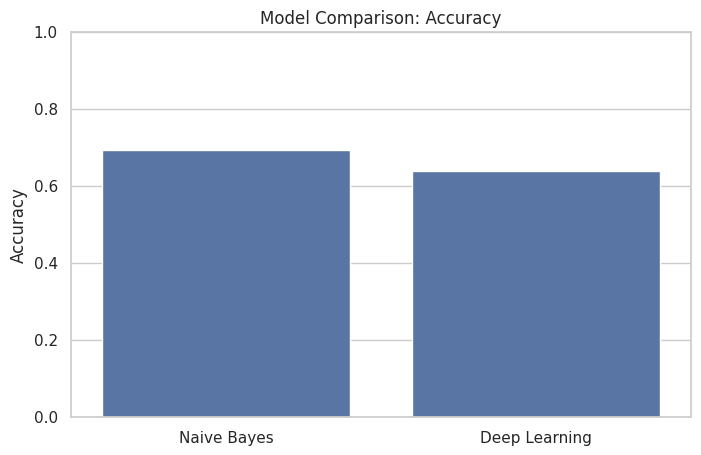

In [ ]:
models = ['Naive Bayes', 'Deep Learning']
accuracy = [0.692626235639861, 0.6392]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy,)
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

The above bar graph indicates that the Naive Bayes model performed better than the Deep Learning model.